<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [19]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [21]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [22]:
df.describe(include='all')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,56182,56238,2.343500e+04,29126.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50207,23911,39041,23015,65437,9993,24942,3674,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38767,30071,NaN,NaN
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,NaN,NaN,1.867570e+05,2.088259
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.079715e+05,8.000000


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [23]:
df.isnull()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,True,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,False,False,True,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
65433,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
65434,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
65435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



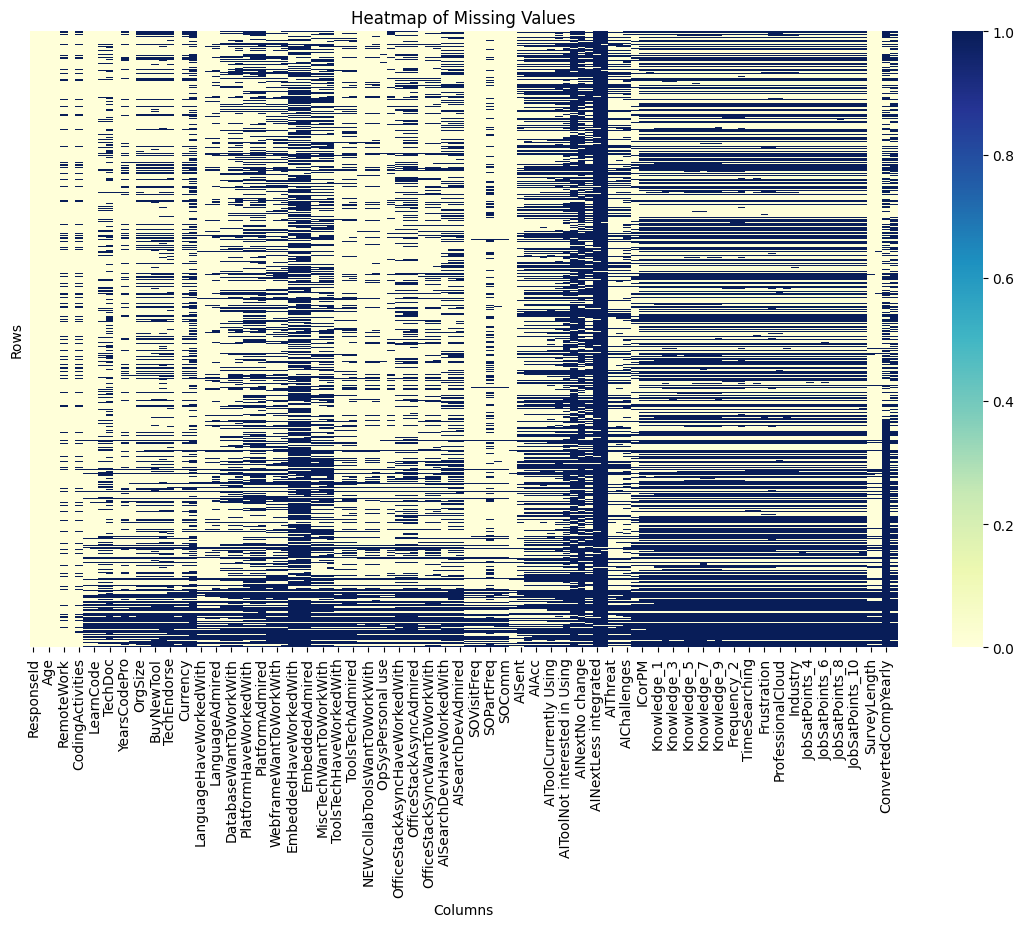

In [24]:
#sns.heatmap(df.isnull(), annot=True, cmap="YlGnBu", yticklabels=False)
#plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(df.isnull(), 
            cmap="YlGnBu",        # Color palette
            cbar=True,            # Show color bar
            yticklabels=False)    # Hide row labels for large datasets

plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [26]:
int(df["Employment"].isnull().sum())

0

### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [27]:
df["Employment"].mode()

0    Employed, full-time
Name: Employment, dtype: object

##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [34]:
df['Employment']=df['Employment'].replace(np.nan,'Employed')
print("Missing values after imputation:", df["Employment"].isnull().sum())

Missing values after imputation: 0


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


/tmp/ipykernel_1256/2692696183.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


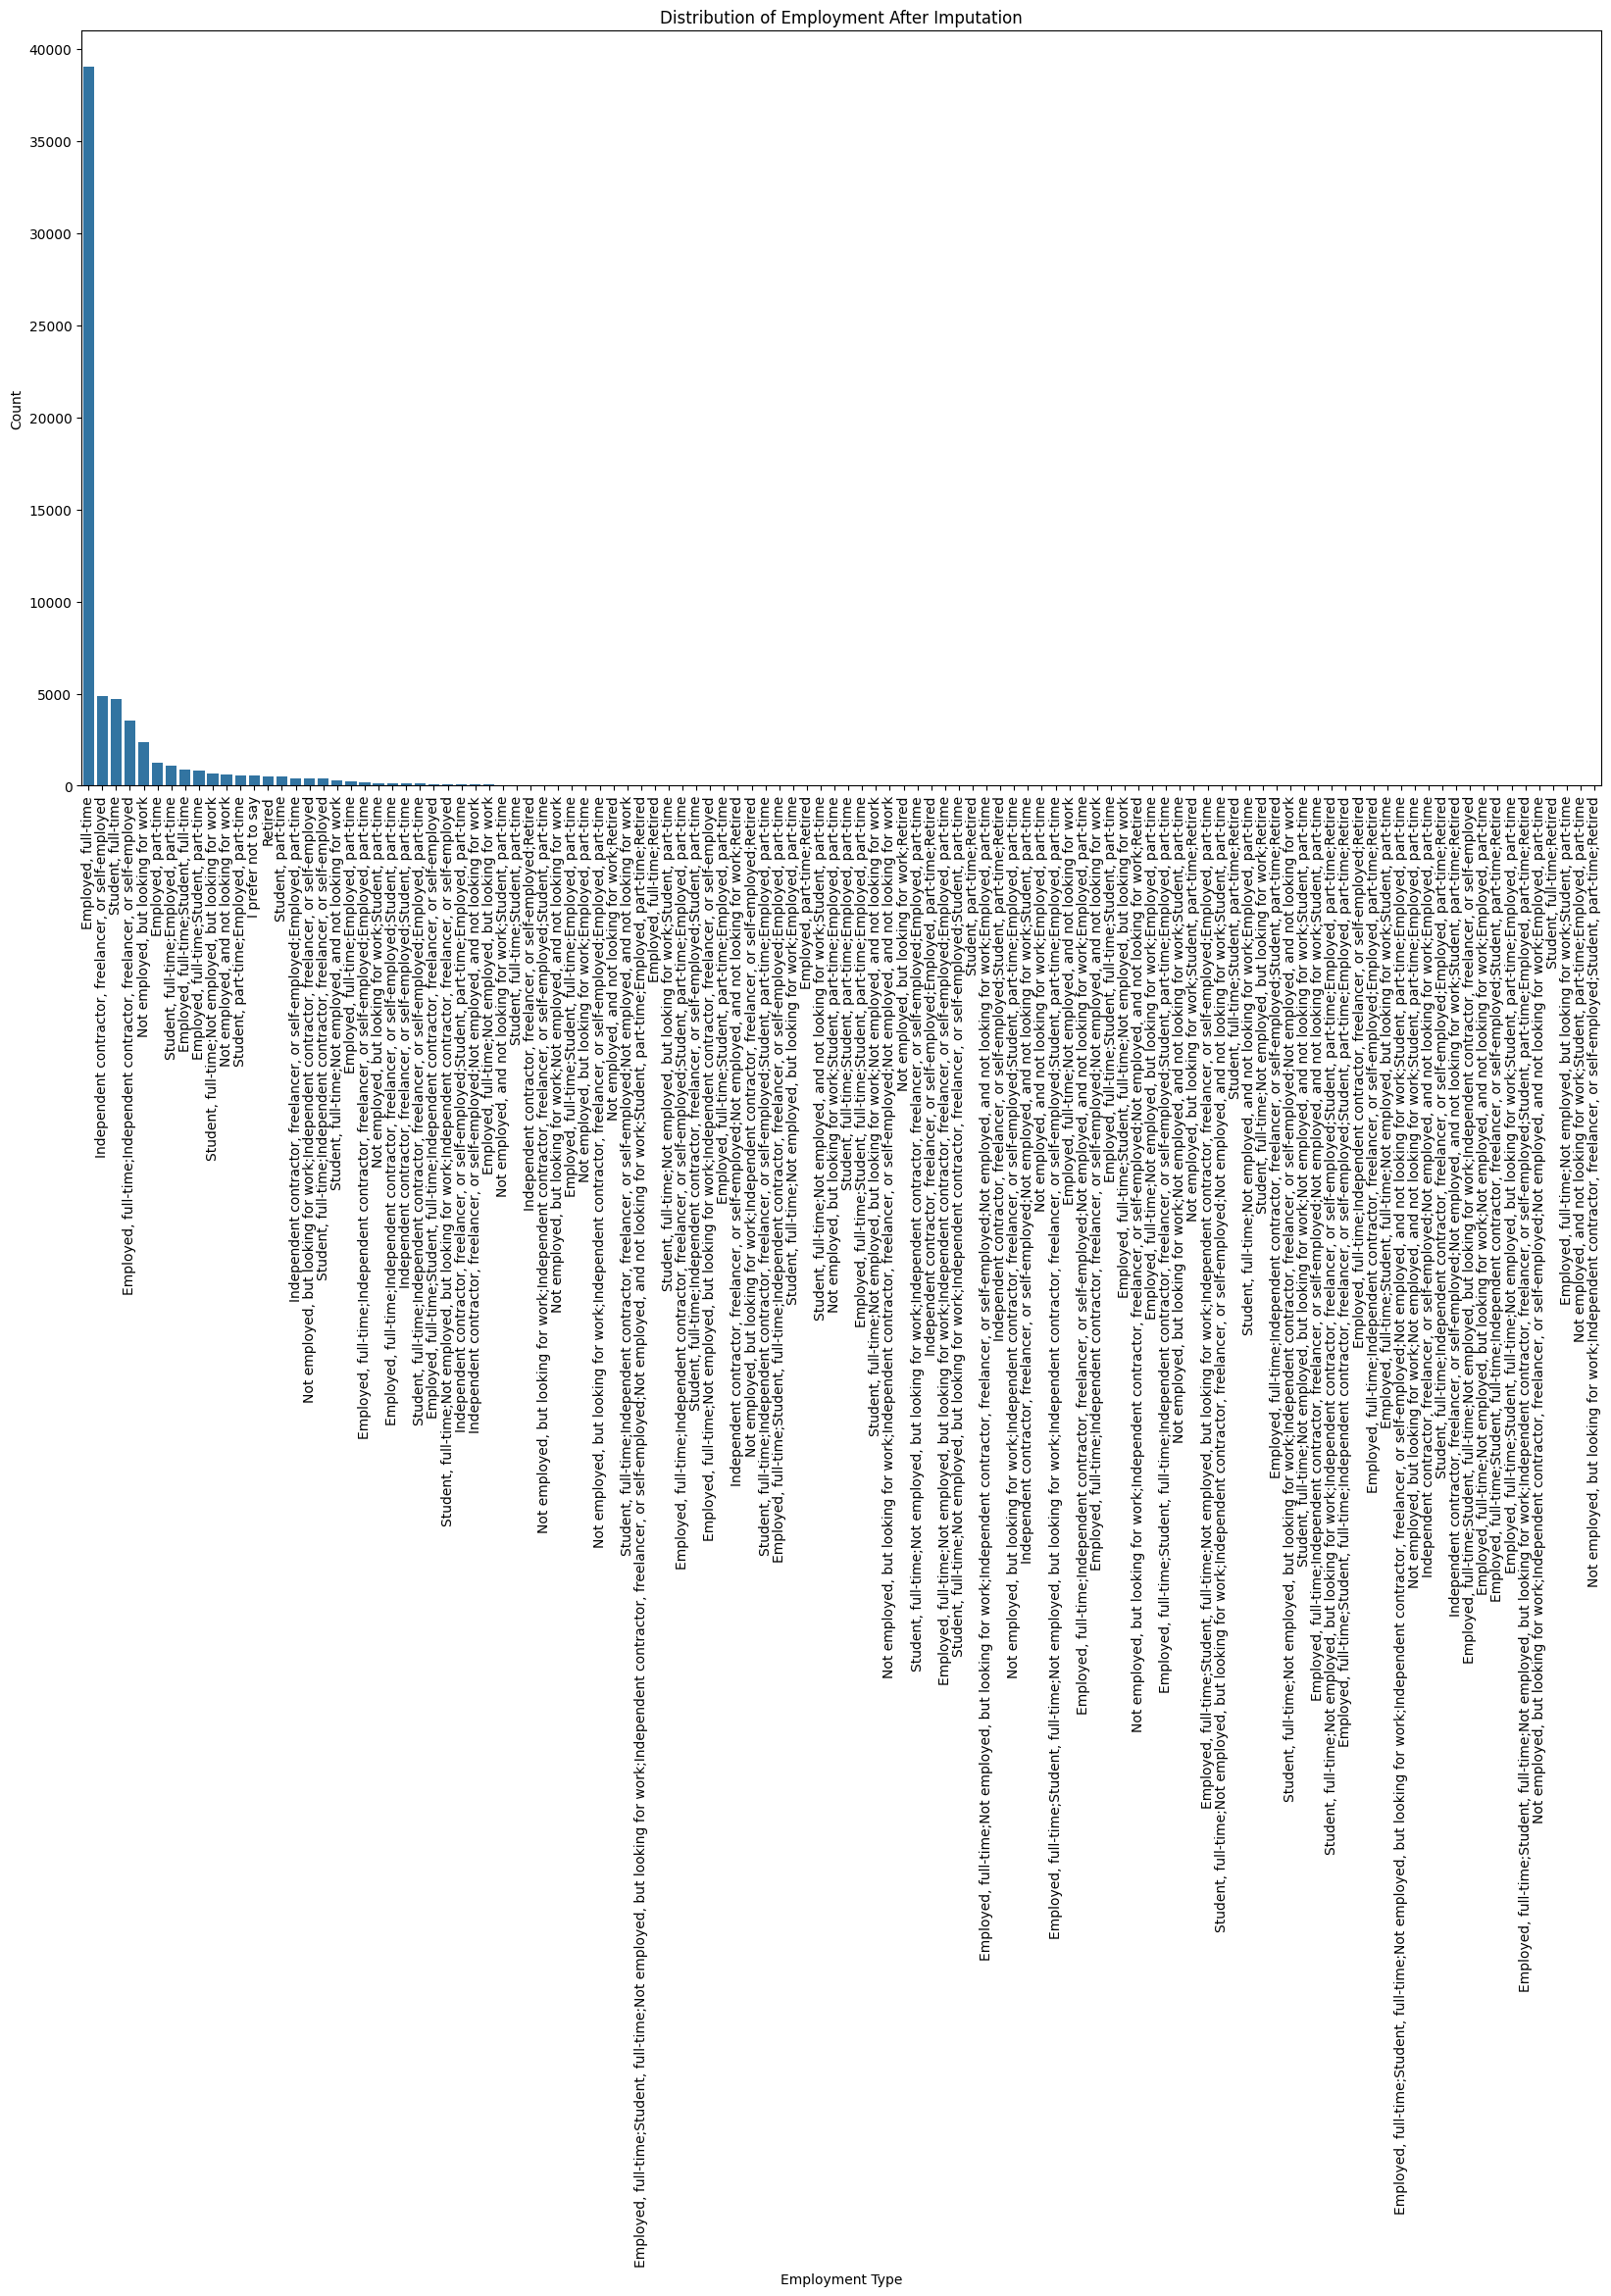

In [36]:
plt.figure(figsize=(20, 10))

sns.countplot(data=df, x="Employment", order=df["Employment"].value_counts().index)

plt.title("Distribution of Employment After Imputation")
plt.xticks(rotation=90)
plt.xlabel("Employment Type")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
